<a href="https://colab.research.google.com/github/wangyeye66/projects/blob/main/LoanPridiction_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LendingClub Loan Prediction


In this project, we use supervised learning models to identify whether the LC loan will be default in the future and make a prediction of their loan interest rate. Dataset Infomation: https://drive.google.com/file/d/1VOAhrB5eIhFc8C5qeFx5QYa2OLD7s1eV/view.

#Part 0: Set up Google Environmet


In [ ]:
import pandas as pd
import numpy as np

from tabulate import tabulate


from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split


from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)


#link = 'https://drive.google.com/file/d/1wpvbxGzzX1m0lcsnUXOAPd_vAE08URbN'

link = 'https://drive.google.com/open?id=1VOAhrB5eIhFc8C5qeFx5QYa2OLD7s1eV'
fluff, id = link.split('=')
file = drive.CreateFile({'id':id})
file.GetContentFile('loan-clean-version.csv')
LC_df  = pd.read_csv('loan-clean-version.csv')
LC_df.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,...,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,loan_status
0,1077501,5000,5000,4975.0,36 months,10.65,162.87,B,10+ years,RENT,...,13648,83.7,9,0,0,5861.071414,5831.78,5000.00,861.07,Fully Paid
1,1077430,2500,2500,2500.0,60 months,15.27,59.83,C,Less than 1 year,RENT,...,1687,9.4,4,0,0,1008.710000,1008.71,456.46,435.17,Charged Off
2,1077175,2400,2400,2400.0,36 months,15.96,84.33,C,10+ years,RENT,...,2956,98.5,10,0,0,3003.653644,3003.65,2400.00,603.65,Fully Paid
3,1076863,10000,10000,10000.0,36 months,13.49,339.31,C,10+ years,RENT,...,5598,21.0,37,0,0,12226.302210,12226.30,10000.00,2209.33,Fully Paid
4,1075269,5000,5000,5000.0,36 months,7.90,156.46,A,3 years,RENT,...,7963,28.3,12,0,0,5631.377753,5631.38,5000.00,631.38,Fully Paid


#Part 1: Data Exploration
## 1.1 Understanding Data

##Full description of each fields:

LoanStatNew	 | Description
--- | ---
zip_code	|The first 3 numbers of the zip code provided by the borrower in the loan application.
addr_state	|The state provided by the borrower in the loan application
annual_inc|	The annual income provided by the borrower during registration.
collection_recovery_fee |	post charge off collection fee
collections_12_mths_ex_med |	Number of collections in 12 months excluding medical collections
delinq_2yrs	|The number of 30+ days past-due incidences of delinquency in the borrower’s credit file for the past 2 years
desc |	Loan description provided by the borrower
dti	| A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.
earliest_cr_line	|The month the borrower’s earliest reported credit line was opened
emp_length|	Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.
emp_title|	The job title supplied by the Borrower when applying for the loan.
fico_range_high	|The upper boundary of range the borrower’s FICO belongs to.
fico_range_low|	The lower boundary of range the borrower’s FICO belongs to.
funded_amnt |	The total amount committed to that loan at that point in time.
funded_amnt_inv|	The total amount committed by investors for that loan at that point in time.
grade |	LC assigned loan grade
home_ownership|	The home ownership status provided by the borrower during registration. Our values are: RENT, OWN, MORTGAGE, OTHER.
id |	A unique LC assigned ID for the loan listing.
initial_list_status |	The initial listing status of the loan. Possible values are – W, F
inq_last_6mths |	The number of inquiries by creditors during the past 6 months.
installment	| The monthly payment owed by the borrower if the loan originates.
int_rate |	Interest Rate on the loan
is_inc_v |	Indicates if income was verified by LC, not verified, or if the income source was verified
issue_d	 | The month which the loan was funded
last_credit_pull_d |	The most recent month LC pulled credit for this loan
last_fico_range_high |	The last upper boundary of range the borrower’s FICO belongs to pulled.
last_fico_range_low |	The last lower boundary of range the borrower’s FICO belongs to pulled.
last_pymnt_amnt	| Last total payment amount received
last_pymnt_d |	Last month payment was received
loan_amnt |	The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.
loan_status |	Current status of the loan
member_id |	A unique LC assigned Id for the borrower member.
mths_since_last_delinq	| The number of months since the borrower’s last delinquency.
mths_since_last_major_derog	| Months since most recent 90-day or worse rating
mths_since_last_record |	The number of months since the last public record.
next_pymnt_d	| Next scheduled payment date
open_acc	| The number of open credit lines in the borrower’s credit file.
out_prncp |	Remaining outstanding principal for total amount funded
out_prncp_inv	| Remaining outstanding principal for portion of total amount funded by investors
policy_code |	Publicly available policy_code=1, new products not publicly available policy_code=2
pub_rec	|Number of derogatory public records
purpose	| A category provided by the borrower for the loan request.
pymnt_plan |	Indicates if a payment plan has been put in place for the loan
recoveries |	post charge off gross recovery
revol_bal |	Total credit revolving balance
revol_util|	Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.
sub_grade |	LC assigned loan subgrade
term	| The number of payments on the loan. Values are in months and can be either 36 or 60.
title |	The loan title provided by the borrower
total_acc	| The total number of credit lines currently in the borrower’s credit file
total_pymnt	|Payments received to date for total amount funded
total_pymnt_inv |	Payments received to date for portion of total amount funded by investors
total_rec_int	| Interest received to date
total_rec_late_fee|	Late fees received to date
total_rec_prncp	| Principal received to date
url	| URL for the LC page with listing data.

In [ ]:
# check data info
LC_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9004 entries, 0 to 9003
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   9004 non-null   int64  
 1   loan_amnt            9004 non-null   int64  
 2   funded_amnt          9004 non-null   int64  
 3   funded_amnt_inv      9004 non-null   float64
 4   term                 9004 non-null   object 
 5   int_rate             9004 non-null   float64
 6   installment          9004 non-null   float64
 7   grade                9004 non-null   object 
 8   emp_length           8688 non-null   object 
 9   home_ownership       9004 non-null   object 
 10  annual_inc           9004 non-null   float64
 11  verification_status  9004 non-null   object 
 12  purpose              9004 non-null   object 
 13  addr_state           9004 non-null   object 
 14  dti                  9004 non-null   float64
 15  earliest_cr_line     9004 non-null   i

In [ ]:
# check how many unique values in each column
LC_df.nunique()

id                     9004
loan_amnt               604
funded_amnt             681
funded_amnt_inv        1234
term                      2
int_rate                 70
installment            3871
grade                     7
emp_length               11
home_ownership            3
annual_inc             1555
verification_status       3
purpose                  13
addr_state               45
dti                    2559
earliest_cr_line        458
inq_last_6mths            9
open_acc                 33
pub_rec                   3
revol_bal              7573
revol_util             1023
total_acc                63
out_prncp                 1
out_prncp_inv             1
total_pymnt            8962
total_pymnt_inv        8942
total_rec_prncp        2199
total_rec_int          8838
loan_status               2
dtype: int64

In [ ]:
# check null value
LC_df.isnull().sum()

id                       0
loan_amnt                0
funded_amnt              0
funded_amnt_inv          0
term                     0
int_rate                 0
installment              0
grade                    0
emp_length             316
home_ownership           0
annual_inc               0
verification_status      0
purpose                  0
addr_state               0
dti                      0
earliest_cr_line         0
inq_last_6mths           0
open_acc                 0
pub_rec                  0
revol_bal                0
revol_util               3
total_acc                0
out_prncp                0
out_prncp_inv            0
total_pymnt              0
total_pymnt_inv          0
total_rec_prncp          0
total_rec_int            0
loan_status              0
dtype: int64

In [ ]:
LC_df.loc[:, 'loan_status'].value_counts()

Fully Paid     7487
Charged Off    1517
Name: loan_status, dtype: int64

## 1.2 EDA

In [ ]:
# numerical features
numCol = []

for col in LC_df:
  if LC_df[col].dtype ==  float:
    numCol.append(col)
# correlation of numerical features
corr = LC_df[numCol].corr()
corr

,funded_amnt_inv,int_rate,installment,annual_inc,dti,revol_util,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int
funded_amnt_inv,1.000000,0.302945,0.959195,0.371554,0.025192,0.022395,0.884368,0.885395,0.829373,0.734486
int_rate,0.302945,1.000000,0.267857,0.076103,0.091614,0.470893,0.259296,0.258493,0.124425,0.531955
installment,0.959195,0.267857,1.000000,0.385192,0.017451,0.056484,0.859719,0.859358,0.827792,0.660184
annual_inc,0.371554,0.076103,0.385192,1.000000,-0.176920,-0.005319,0.366455,0.364869,0.365577,0.253143
dti,0.025192,0.091614,0.017451,-0.176920,1.000000,0.243479,0.020130,0.019860,-0.004552,0.077365
revol_util,0.022395,0.470893,0.056484,-0.005319,0.243479,1.000000,0.022241,0.024014,-0.036570,0.171383
total_pymnt,0.884368,0.259296,0.859719,0.366455,0.020130,0.022241,1.000000,0.998224,0.968533,0.795019
total_pymnt_inv,0.885395,0.258493,0.859358,0.364869,0.019860,0.024014,0.998224,1.000000,0.966596,0.794365
total_rec_prncp,0.829373,0.124425,0.827792,0.365577,-0.004552,-0.036570,0.968533,0.966596,1.000000,0.634057
total_rec_int,0.734486,0.531955,0.660184,0.253143,0.077365,0.171383,0.795019,0.794365,0.634057,1.000000


[Text(0.5, 0, 'funded_amnt_inv'),
 Text(1.5, 0, 'int_rate'),
 Text(2.5, 0, 'installment'),
 Text(3.5, 0, 'annual_inc'),
 Text(4.5, 0, 'dti'),
 Text(5.5, 0, 'revol_util'),
 Text(6.5, 0, 'total_pymnt'),
 Text(7.5, 0, 'total_pymnt_inv'),
 Text(8.5, 0, 'total_rec_prncp'),
 Text(9.5, 0, 'total_rec_int')]

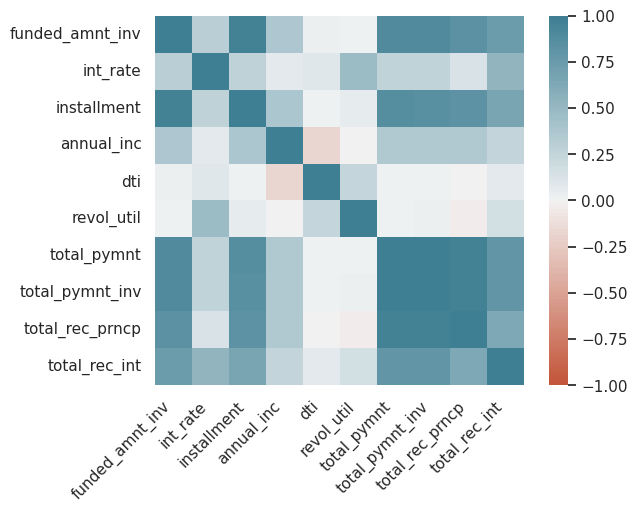

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

ax = sns.heatmap(
    corr,
    vmin = -1, vmax = 1, center = 0,
    cmap = sns.diverging_palette(20,220,n=200),
    square = True
)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation = 45,
    horizontalalignment = 'right'
)

Note that **total_pymnt** and **total_pymnt_inv** are highly correlated; **funded_amnt_inv** and **installment** are highly correlated.

<Axes: >

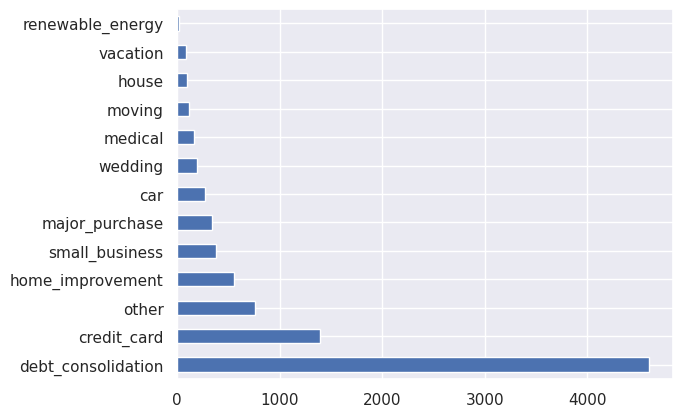

In [ ]:
# Purpose of loan
LC_df['purpose'].value_counts().plot(kind = 'barh')


Most loan amount is around $10,000

<Axes: title={'center': 'Top 10 Loan Amount'}>

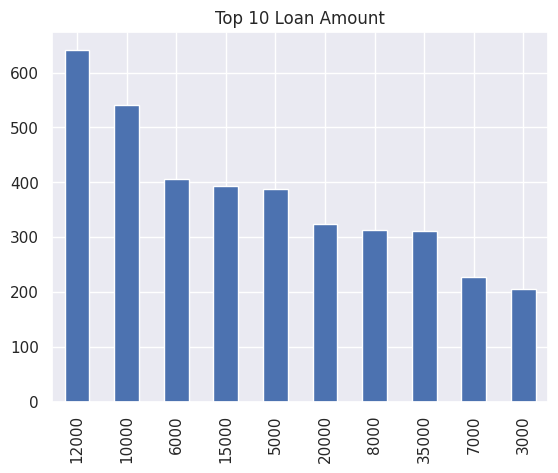

In [ ]:
# Loan Amount top 10
LC_df['loan_amnt'].value_counts()[:10].plot(kind = 'bar',
                                            title = 'Top 10 Loan Amount')

Most of borrowers rent or mortgage a home.

<Axes: ylabel='home_ownership'>

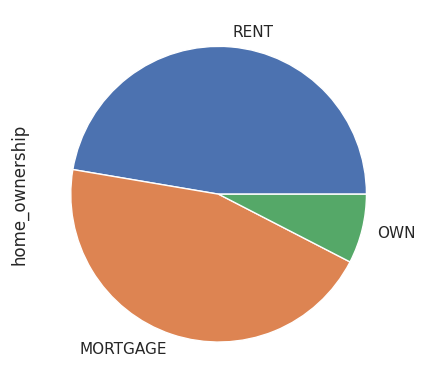

In [ ]:
LC_df['home_ownership'].value_counts().plot(kind = 'pie')

The majority of borrower have more than 10 years' employment histoty.

<Axes: >

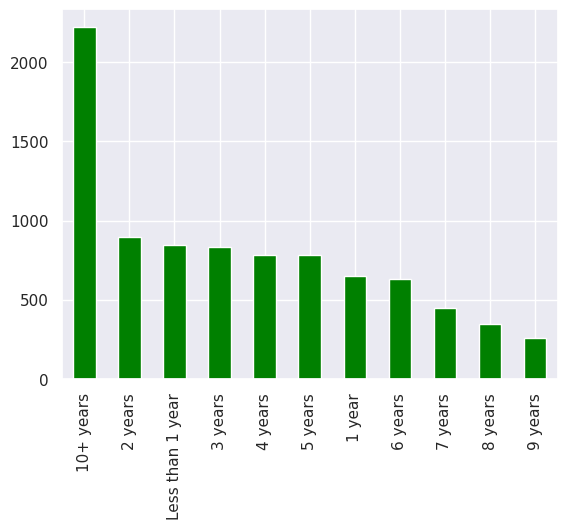

In [ ]:
LC_df['emp_length'].value_counts().plot(kind = 'bar', color = 'green')

Based on the dataset, the top three states in terms of loan amount are California, New York, and Texas.

In [ ]:
# total loan amount by states
df_location = LC_df.groupby('addr_state').sum().reset_index()
df_location = df_location[['addr_state','loan_amnt']].sort_values(by = 'loan_amnt',
                                                               ascending = False)
df_location.head(3)


<ipython-input-12-a8d62f231c51>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_location = LC_df.groupby('addr_state').sum().reset_index()


,addr_state,loan_amnt
4,CA,20470425
28,NY,10182575
37,TX,8453150


In [ ]:
import plotly.graph_objects as go

fig = go.Figure(data = go.Choropleth(
    locations = df_location['addr_state'],
    z = df_location['loan_amnt'].astype(float), # Date to be color-coded
    locationmode = 'USA-states', # locations which match entries in 'addr_state'
    colorscale = 'YlOrRd',
    colorbar_title = 'USD'
))

fig.update_layout(
    title_text = 'Total amount issued by State',
    geo_scope = 'usa' # limited map scale to USA
)

fig.show()

Top three averaged annual income by States.

In [ ]:
df_income = LC_df.groupby('addr_state').mean().reset_index()
df_income = df_income.filter(['addr_state', 'annual_inc'], axis = 1).sort_values(by = 'annual_inc',                                                                               ascending = False)
df_income.head(3)

<ipython-input-14-da7f1febe83a>:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



,addr_state,annual_inc
36,TN,120000.000000
21,MS,106870.000000
6,CT,81709.112686


In [ ]:
# Visualization
fig = go.Figure(data = go.Choropleth(
    locations = df_income['addr_state'],
    z = df_income['annual_inc'].astype(float), # Date to be color-coded
    locationmode = 'USA-states', # locations which match entries in 'addr_state'
    colorscale = 'Reds',
    colorbar_title = 'USD'
))

fig.update_layout(
    title_text = 'Average income of loaners in terms of States',
    geo_scope = 'usa' # limited map scale to USA
)

fig.show()

The credit grades 'A' and 'B' are significantly higher than the other grades

<Axes: xlabel='grade', ylabel='count'>

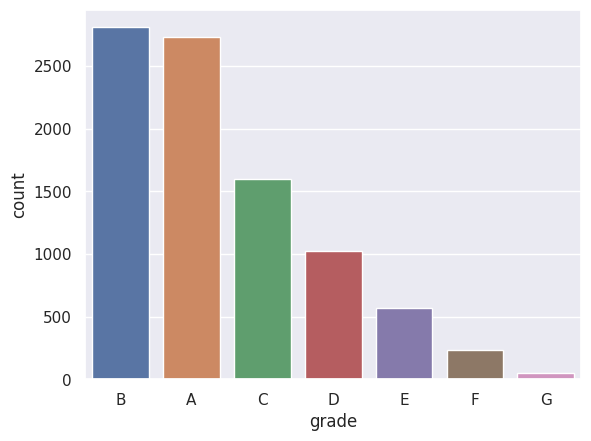

In [ ]:
# credict grade distribution
sns.countplot(x="grade", data= LC_df, order = LC_df['grade'].value_counts().index)


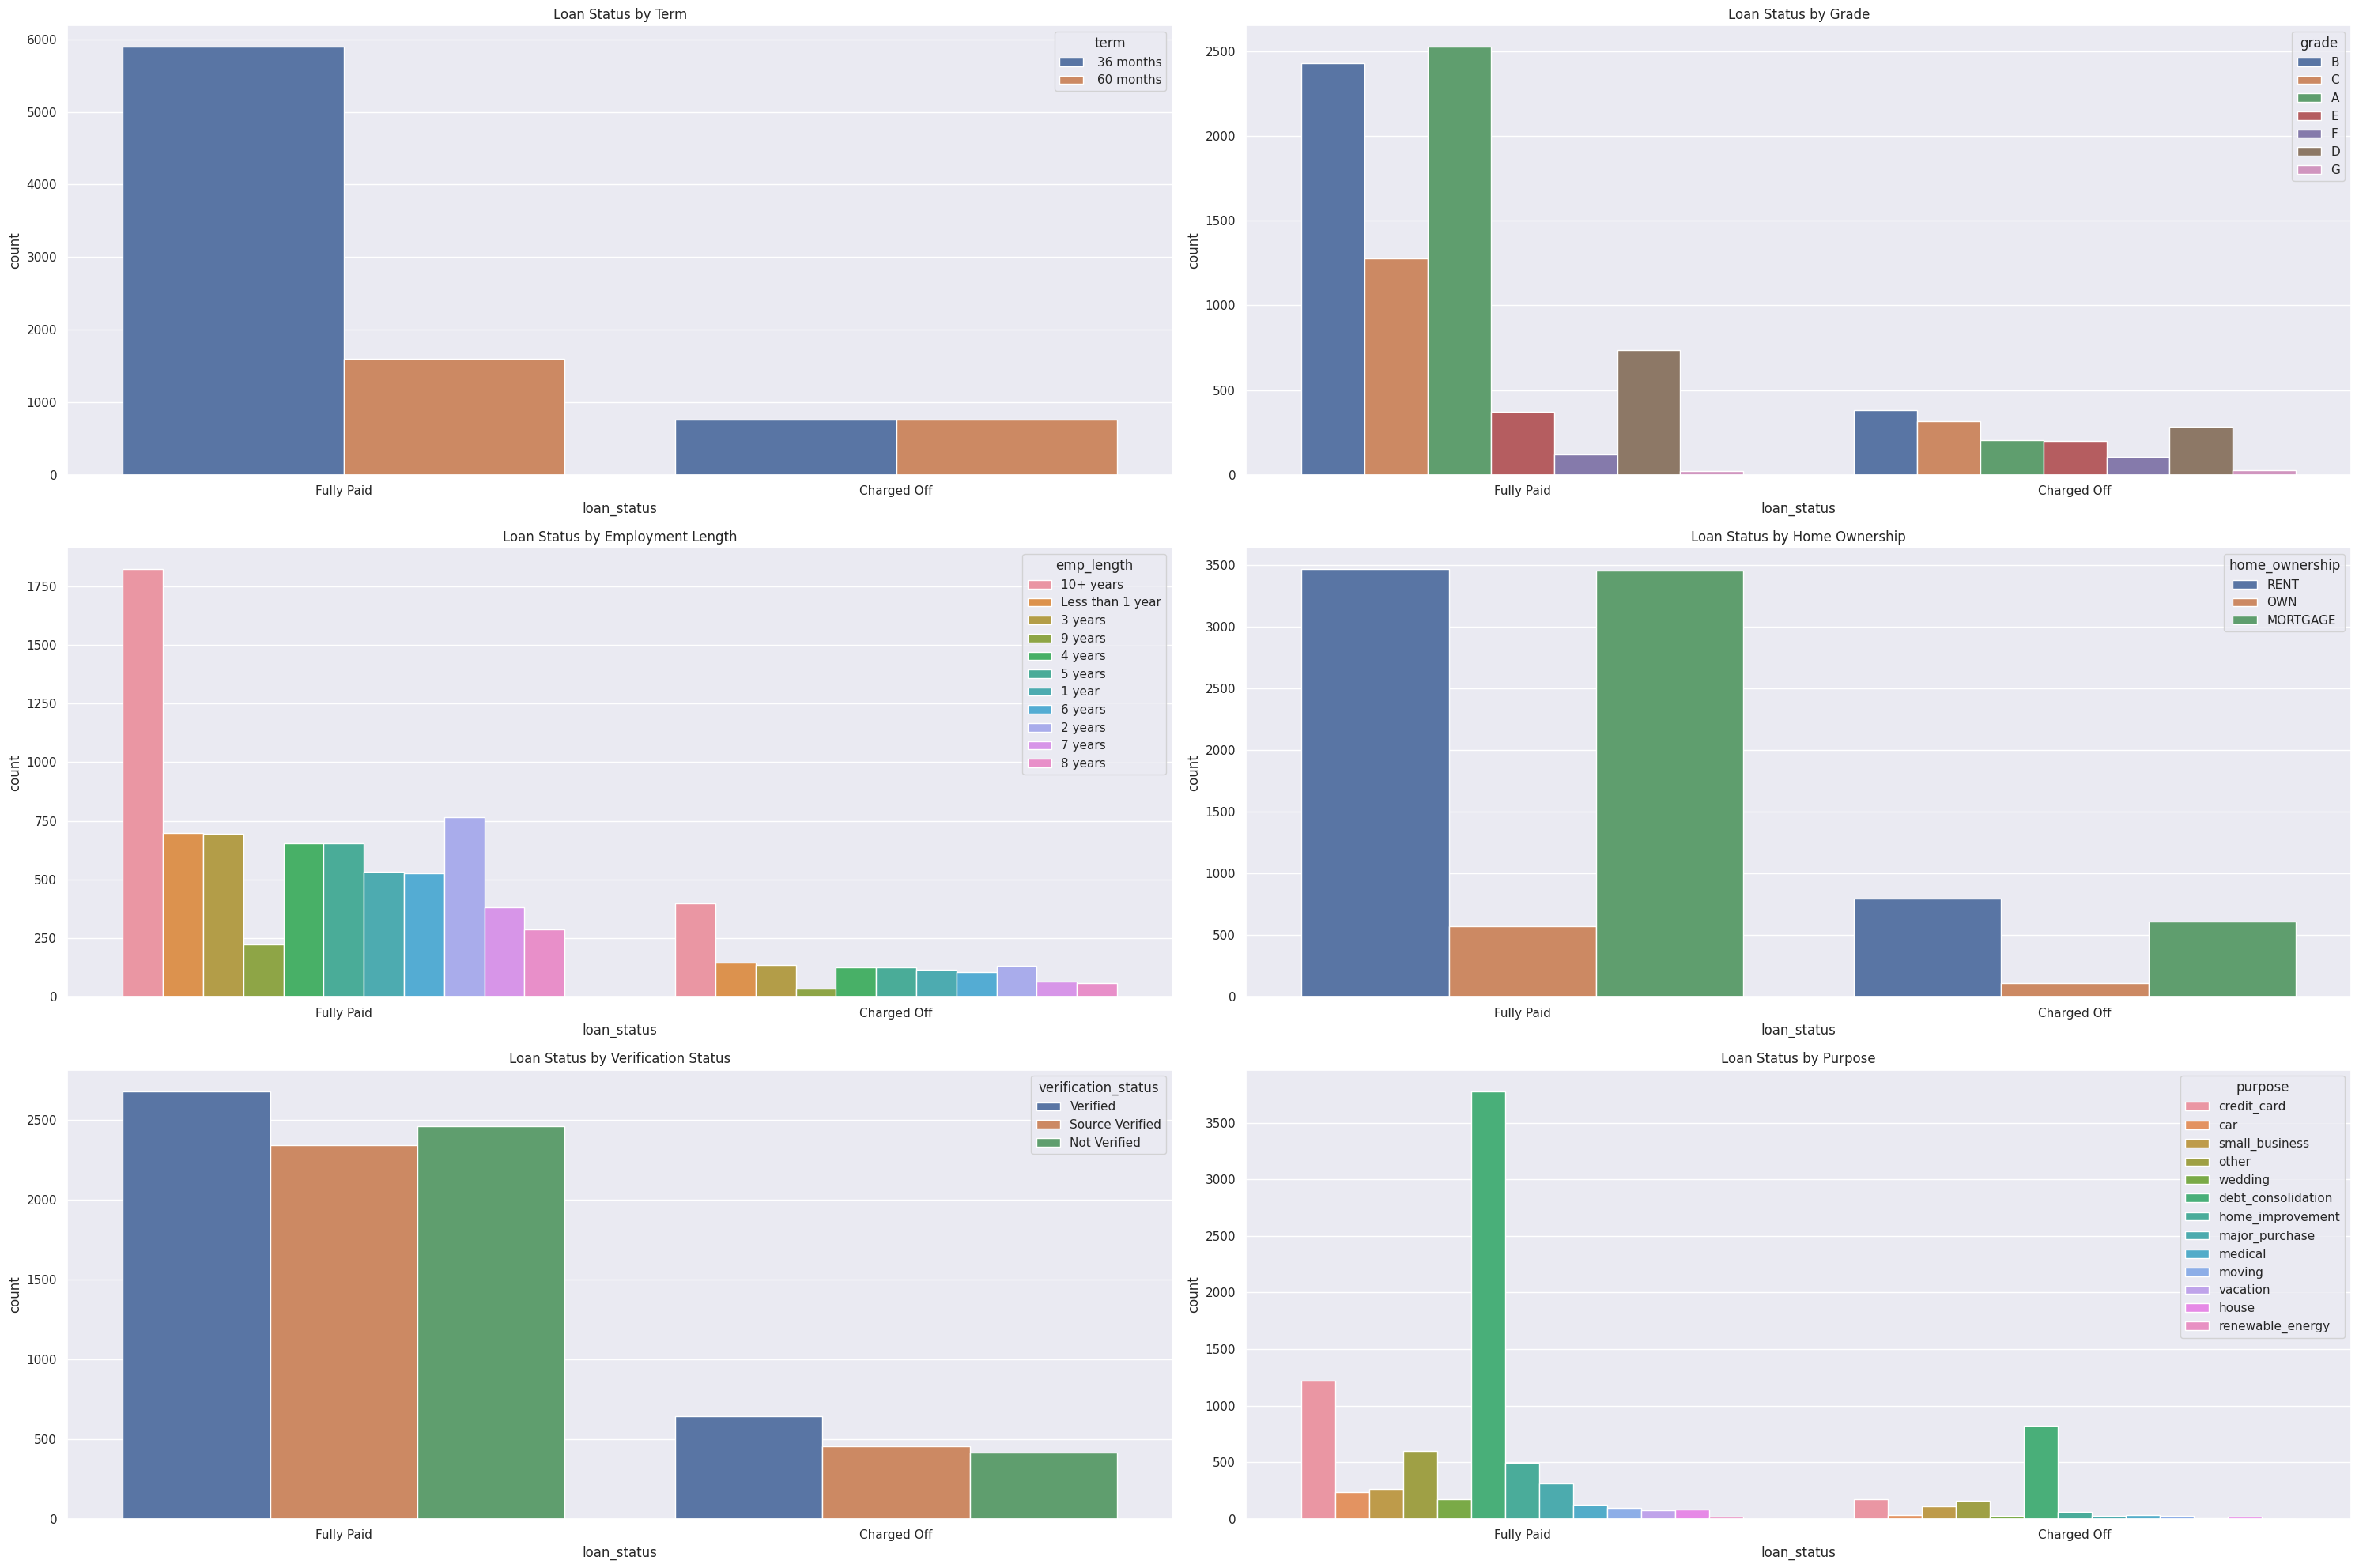

In [ ]:
# Understand categorical data
_, axss = plt.subplots(3, 2, figsize=[30, 20])  # create 3x2 grid

sns.countplot(x='loan_status', hue='term', data=LC_df, ax=axss[0][0])
axss[0][0].set_title('Loan Status by Term')

sns.countplot(x='loan_status', hue='grade', data=LC_df, ax=axss[0][1])
axss[0][1].set_title('Loan Status by Grade')

sns.countplot(x='loan_status', hue='emp_length', data=LC_df, ax=axss[1][0])
axss[1][0].set_title('Loan Status by Employment Length')

sns.countplot(x='loan_status', hue='home_ownership', data=LC_df, ax=axss[1][1])
axss[1][1].set_title('Loan Status by Home Ownership')

sns.countplot(x='loan_status', hue='verification_status', data=LC_df, ax=axss[2][0])
axss[2][0].set_title('Loan Status by Verification Status')

sns.countplot(x='loan_status', hue='purpose', data=LC_df, ax=axss[2][1])
axss[2][1].set_title('Loan Status by Purpose')

plt.tight_layout()
plt.show()


Based on this dataset, we can derive several insights from the categorical data:

1. Loans with a 36-month term are more likely to be fully paid compared to loans with a 60-month term.
2. The higher the credit grade, the more likely a person is to fully pay off their loan.
3. The ability of a borrower to fully pay off a loan does not seem to correlate with their employment length.
4. Individuals with a mortgage are more likely to fully pay off their loans.
5. Borrowers are more likely to fully pay off their loans when their verification status is 'not verified'.
6. Borrowers are least likely to fully pay off their loans when the purpose of borrowing is for a small business."

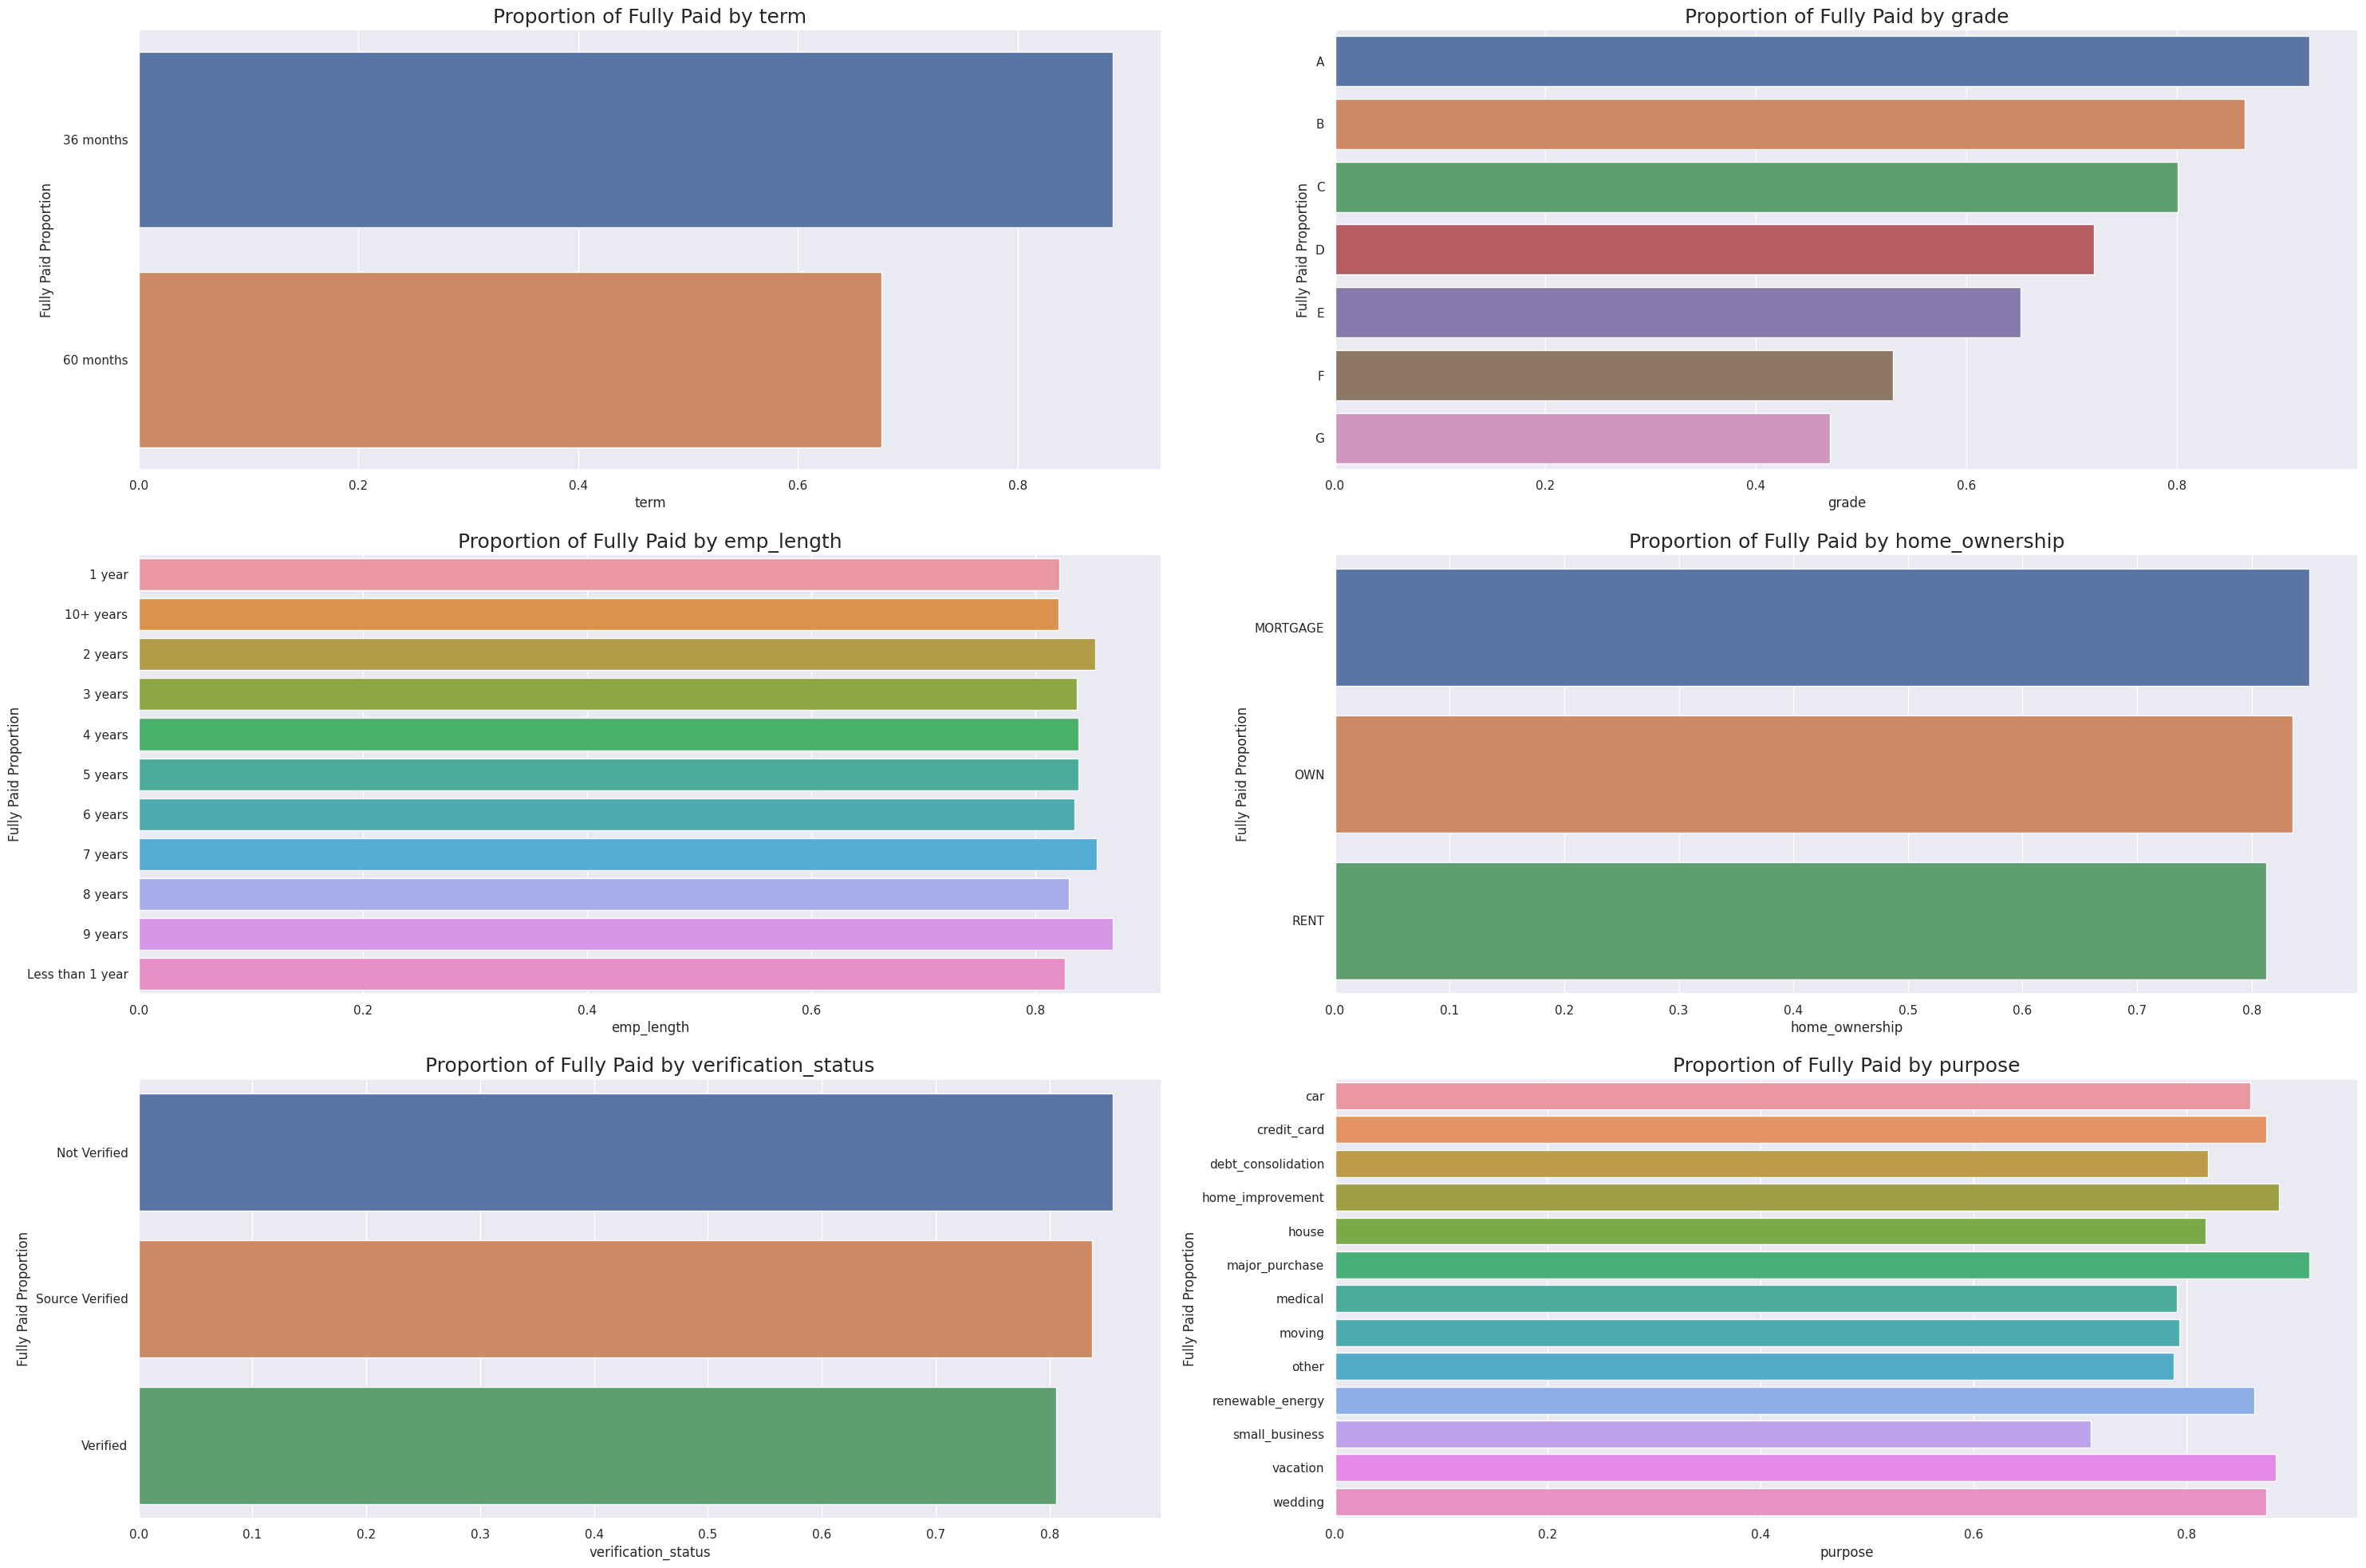

In [ ]:
# proportion of fully paid loans
list = ['term', 'grade', 'emp_length','home_ownership','verification_status','purpose']
group_dfs = {}
for col in list:
  dftmp = LC_df.groupby([col,'loan_status']).size().unstack()
  dftmp['Fully Paid Proportion'] = dftmp['Fully Paid'] / (dftmp['Fully Paid'] + dftmp['Charged Off'])
  group_dfs[col] = dftmp

fig, axes = plt.subplots(3, 2, figsize=(30, 20))
axes = axes.flatten()

for i,(col, df) in enumerate(group_dfs.items()):
  sns.set(font_scale=1.5)
  sns.barplot(data=df.reset_index(), x='Fully Paid Proportion', y=col, ax=axes[i], orient = 'h')
  axes[i].set_title(f'Proportion of Fully Paid by {col}')
  axes[i].set_ylabel('Fully Paid Proportion')
  axes[i].set_xlabel(col)

plt.tight_layout()
plt.show()



# Part 2 Date Cleaning and Feature Preprocessing
## Data Cleaning

In [ ]:
LC_df.describe()

,id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,earliest_cr_line,inq_last_6mths,...,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int
count,9.004000e+03,9004.000000,9004.000000,9004.000000,9004.000000,9004.000000,9.004000e+03,9004.000000,9004.000000,9004.000000,...,9004.000000,9004.000000,9001.000000,9004.000000,9004.0,9004.0,9004.000000,9004.000000,9004.000000,9004.000000
mean,9.632337e+05,12291.884163,12154.156486,12076.054639,12.126728,357.478229,6.957693e+04,13.889958,37300.462794,0.857175,...,0.047423,13658.416148,52.368789,22.438583,0.0,0.0,13037.547635,12943.841207,10563.492623,2328.716827
std,7.953238e+04,8285.682170,8096.937145,8033.211335,4.195740,227.180439,4.885841e+04,6.609968,4379.652217,1.043980,...,0.215667,15038.825421,27.644807,11.146531,0.0,0.0,9838.298075,9743.909609,7946.456673,2650.982007
min,4.581650e+05,1000.000000,1000.000000,750.000000,5.420000,30.160000,6.000000e+03,0.000000,19998.000000,0.000000,...,0.000000,0.000000,0.000000,3.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000
25%,8.778840e+05,6000.000000,6000.000000,6000.000000,8.490000,187.750000,4.200000e+04,8.860000,34455.000000,0.000000,...,0.000000,4559.750000,30.500000,14.000000,0.0,0.0,5802.197477,5779.940000,4800.000000,682.042500
50%,9.879685e+05,10000.000000,10000.000000,10000.000000,11.710000,312.910000,6.000000e+04,13.940000,36161.000000,1.000000,...,0.000000,9889.000000,54.700000,21.000000,0.0,0.0,10623.210000,10577.545000,8650.000000,1367.130000
75%,1.033607e+06,16000.000000,16000.000000,15975.000000,15.230000,469.360000,8.300000e+04,19.082500,42827.000000,1.000000,...,0.000000,17468.250000,75.000000,29.000000,0.0,0.0,17354.405075,17225.490000,14500.000000,2881.767500
max,1.077501e+06,35000.000000,35000.000000,35000.000000,24.110000,1288.100000,1.782000e+06,29.920000,43076.000000,8.000000,...,2.000000,148804.000000,99.900000,79.000000,0.0,0.0,56809.051630,56475.050000,35000.010000,21809.050000


Convert categorical data to numerical

In [ ]:
class_mapping = {label:idx for idx, label in enumerate(np.unique(LC_df['term']))}
LC_df['term']=LC_df['term'].map(class_mapping)
class_mapping = {label:idx for idx, label in enumerate(np.unique(LC_df['grade']))}
LC_df['grade']=LC_df['grade'].map(class_mapping)
class_mapping = {label:idx for idx, label in enumerate(np.unique(LC_df['home_ownership']))}
LC_df['home_ownership']=LC_df['home_ownership'].map(class_mapping)

class_mapping = {label:idx for idx, label in enumerate(np.unique(LC_df['verification_status']))}
LC_df['verification_status']=LC_df['verification_status'].map(class_mapping)

class_mapping = {label:idx for idx, label in enumerate(np.unique(LC_df['purpose']))}
LC_df['purpose']=LC_df['purpose'].map(class_mapping)

class_mapping = {label:idx for idx, label in enumerate(np.unique(LC_df['addr_state']))}
LC_df['addr_state']=LC_df['addr_state'].map(class_mapping)

class_mapping = {'Fully Paid' : 0, 'Charged Off' : 1}
LC_df['loan_status']=LC_df['loan_status'].map(class_mapping)

LC_df.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,...,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,loan_status
0,1077501,5000,5000,4975.0,0,10.65,162.87,1,10+ years,2,...,13648,83.7,9,0,0,5861.071414,5831.78,5000.00,861.07,0
1,1077430,2500,2500,2500.0,1,15.27,59.83,2,Less than 1 year,2,...,1687,9.4,4,0,0,1008.710000,1008.71,456.46,435.17,1
2,1077175,2400,2400,2400.0,0,15.96,84.33,2,10+ years,2,...,2956,98.5,10,0,0,3003.653644,3003.65,2400.00,603.65,0
3,1076863,10000,10000,10000.0,0,13.49,339.31,2,10+ years,2,...,5598,21.0,37,0,0,12226.302210,12226.30,10000.00,2209.33,0
4,1075269,5000,5000,5000.0,0,7.90,156.46,0,3 years,2,...,7963,28.3,12,0,0,5631.377753,5631.38,5000.00,631.38,0


After data cleaning, we have decrease the number of columns to 23.

In [ ]:
# drop missing values
LC_df = LC_df.select_dtypes(include=[np.number]).interpolate().dropna()

# drop high correlation and high variance columns
LC_df = LC_df.drop(["total_pymnt"], axis=1)
LC_df = LC_df.drop(["total_pymnt_inv"], axis=1)
LC_df = LC_df.drop(["total_rec_int"], axis=1)
LC_df = LC_df.drop(["id"], axis=1)
LC_df = LC_df.drop(["total_rec_prncp"], axis=1)

LC_df.shape

(9004, 23)

## Data Split

In [ ]:
# split data
from sklearn.model_selection import train_test_split

y = LC_df.loan_status
X = LC_df.drop(['loan_status'], axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = 0.25)

In [ ]:
# check the shapes of train and test dataset
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((6753, 22), (2251, 22), (6753,), (2251,))

## Data Preprocessing

In [ ]:
# Standardization
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Part 3: Model Training and Selection
# 3.1: Random Forest/ Kneighbors/ LogisticRegression
## 3.1.1 Building Models

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

# Logistic Regression
classifier_logistic = LogisticRegression()

# K Nearest Neighbors
classifier_KNN = KNeighborsClassifier()

# Random Forest
classifier_RF = RandomForestClassifier()

In [ ]:
# Logistic Regression
classifier_logistic.fit(X_train, y_train)

# K Nearest Neighbors
classifier_KNN.fit(X_train, y_train)

# Random Forest
classifier_RF.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
predict_Regression = classifier_logistic.predict(X_test)
print('Logistic Regression\n', classification_report(y_test, predict_Regression))

Logistic Regression
               precision    recall  f1-score   support

           0       0.84      0.99      0.91      1872
           1       0.64      0.06      0.10       379

    accuracy                           0.84      2251
   macro avg       0.74      0.52      0.51      2251
weighted avg       0.80      0.84      0.77      2251



In [ ]:
predict_RF = classifier_RF.predict(X_test)
print('Random Forest\n', classification_report(y_test, predict_RF))

Random Forest
               precision    recall  f1-score   support

           0       0.84      0.99      0.91      1872
           1       0.65      0.08      0.15       379

    accuracy                           0.84      2251
   macro avg       0.74      0.54      0.53      2251
weighted avg       0.81      0.84      0.78      2251



In [ ]:
predict_KNN = classifier_KNN.predict(X_test)
print('K Nearest Neighbor\n', classification_report(y_test, predict_KNN))

K Nearest Neighbor
               precision    recall  f1-score   support

           0       0.85      0.96      0.90      1872
           1       0.43      0.15      0.22       379

    accuracy                           0.82      2251
   macro avg       0.64      0.55      0.56      2251
weighted avg       0.78      0.82      0.79      2251



KNN is better in terms of F1 score

## Part 4: Feature Importance


In [ ]:
X_corr = X.copy()
X_corr.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,home_ownership,annual_inc,verification_status,...,dti,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv
0,5000,5000,4975.0,0,10.65,162.87,1,2,24000.0,2,...,27.65,31048,1,3,0,13648,83.7,9,0,0
1,2500,2500,2500.0,1,15.27,59.83,2,2,30000.0,1,...,1.00,36251,5,3,0,1687,9.4,4,0,0
2,2400,2400,2400.0,0,15.96,84.33,2,2,12252.0,0,...,8.72,43040,2,2,0,2956,98.5,10,0,0
3,10000,10000,10000.0,0,13.49,339.31,2,2,49200.0,1,...,20.00,35096,1,10,0,5598,21.0,37,0,0
4,5000,5000,5000.0,0,7.90,156.46,0,2,36000.0,1,...,11.20,43043,3,9,0,7963,28.3,12,0,0


In [ ]:
# feature importance of random forest
classifier_RF.fit(X, y)
importances = classifier_RF.feature_importances_
rank = np.argsort(importances)[::-1]

# show feature ranking
print("Feature importance ranking by Random Forest Model:")
for ind in range(X.shape[1]):
  print("{0},{1}".format(X.columns[rank[ind]],
                         round(importances[rank[ind]], 4)))

Feature importance ranking by Random Forest Model:
annual_inc,0.0798
revol_util,0.0781
dti,0.077
earliest_cr_line,0.0764
revol_bal,0.076
int_rate,0.0734
installment,0.0631
total_acc,0.0623
funded_amnt_inv,0.0545
addr_state,0.0538
open_acc,0.048
funded_amnt,0.046
loan_amnt,0.0448
purpose,0.0352
grade,0.0344
term,0.0339
inq_last_6mths,0.0249
verification_status,0.0168
home_ownership,0.0152
pub_rec,0.0063
out_prncp,0.0
out_prncp_inv,0.0
